In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import copy
import inspect
import warnings
import cProfile

from astropy.table import Table, Column, vstack

import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

import palettable
color_fancy = palettable.wesanderson.Mendl_4.mpl_colors
color_bins = palettable.cartocolors.qualitative.Bold_4_r.mpl_colors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Simple version

* Each survey region is represented as a "box" in (RA, Dec)
* Just overplot a few of them together.

#### Footprints of different surveys

* Footprints of GAMA survey comes from [here](http://www.gama-survey.org/)
* Footprints of HSC survey can be found in the [project proposal](https://hsc.mtk.nao.ac.jp/ssp/wp-content/uploads/2016/05/hsc_ssp_rv_jan13.pdf)
* Footprints of KiDS survey can be found [here](http://kids.strw.leidenuniv.nl/overview.php)
* Survey tiles for KiDS can be found [here](http://kids.strw.leidenuniv.nl/DR4/data_table.php)
    - OmegaCAM@VST has a 1x1 deg^2 field of view


In [42]:
# (RA, Dec) ranges for GAMA
g02_poly = Polygon([
    [30.2, -10.25], [30.2, -3.72], [38.8, -3.72], [38.8, -10.25]
])

g09_poly = Polygon([
    [129.0, -2.0], [129.0, 3.0], [141.0, 3.0], [141.0, -2.0]
])

g12_poly = Polygon([
    [174.0, -3.0], [174.0, 2.0], [186.0, 2.0], [186.0, -3.0]
])

g15_poly = Polygon([
    [211.5, -2.0], [211.5, 3.0], [223.5, 3.0], [223.5, -2.0]
])

g02_arr = np.asarray([[30.2, -10.25], [30.2, -3.72], [38.8, -3.72], [38.8, -10.25]])
g09_arr = np.asarray([[129.0, -2.0], [129.0, 3.0], [141.0, 3.0], [141.0, -2.0]])
g12_arr = np.asarray([[174.0, -3.0], [174.0, 2.0], [186.0, 2.0], [186.0, -3.0]])
g15_arr = np.asarray([[211.5, -2.0], [211.5, 3.0], [223.5, 3.0], [223.5, -2.0]])

In [32]:
# (RA, Dec) ranges for HSC
# HSC spring
hsc1_poly = Polygon([
    [120.5, -2.0], [120.5, 5.0], [225.0, 5.0], [225.0, -2.0]
])

# HSC fall
hsc2_poly = Polygon([
    [-30.0, -1.0], [-30.0, 7.0], [40.0, 7.0], [40.0, -7.0], [27.30, -7.0], [27.30, -1.0]
])

hsc_1_arr = np.asarray([[120.5, -2.0], [120.5, 5.0], [225.0, 5.0], [225.0, -2.0]])
hsc_2_arr = np.asarray([[-30.0, -1.0], [-30.0, 7.0], [40.0, 7.0], [40.0, -7.0], [27.30, -7.0], [27.30, -1.0]])

In [35]:
# (RA, Dec) ranges for KiDS
kids_n_poly = Polygon([
    [156.0, -5.0], [156.0, 4.0], [238.0, 4.0], [238.0, -3.0], [225.0, -3.0], [225.0, -4.0]
])

kids_w2_poly = Polygon([
    [128.5, -2.0], [128.5, 3.0], [141.5, 3.0], [141.5, -2.0]
])

kids_d2_poly = Polygon([
    [149.6, 1.7], [149.6, 2.7], [151.6, 2.7], [151.6, 1.7]
])

kids_n_arr = np.asarray([[156.0, -5.0], [156.0, 4.0], [238.0, 4.0], [238.0, -3.0], [225.0, -3.0], [225.0, -5.0]])
kids_w2_arr = np.asarray([[128.5, -2.0], [128.5, 3.0], [141.5, 3.0], [141.5, -2.0]])
kids_d2_arr = np.asarray([[149.6, 1.7], [149.6, 2.7], [151.6, 2.7], [151.6, 1.7]])

In [103]:
def get_decam_footprints(ra_ini, dec_ini, ra_n=12, dec_n=2, rad=1.1, ra_sep=0.55, dec_sep=2.0):
    """Get the DECam footprints."""
    decam_fps = []
    for ii in np.arange(ra_n):
        for jj in np.arange(dec_n):
            ra = ra_ini + ii * ra_sep
            dec = dec_ini + jj * dec_sep
            decam_fps.append(Circle((ra, dec), rad))
    
    return decam_fps

In [114]:
merian1_fps = PatchCollection(
    get_decam_footprints(120.0, -1.0, ra_n=48, dec_n=2, rad=1.1, ra_sep=0.55, dec_sep=2.0),
    alpha=0.4, facecolor='none', edgecolor='g', linewidth=1.5, zorder=100 
)

merian2_fps = PatchCollection(
    get_decam_footprints(-30.0, 1.0, ra_n=48, dec_n=2, rad=1.1, ra_sep=0.55, dec_sep=2.0),
    alpha=0.4, facecolor='none', edgecolor='g', linewidth=1.5, zorder=100 
)

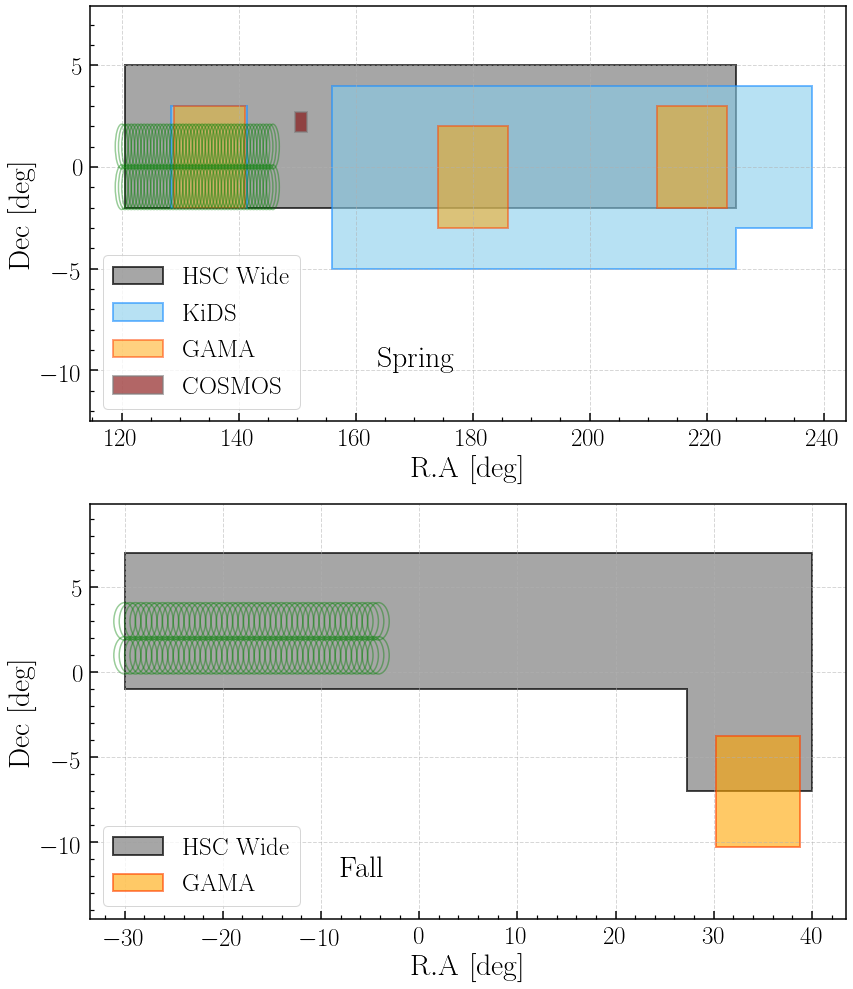

In [115]:
fig = plt.figure(figsize=(12, 15))
fig.subplots_adjust(left=0.12, right=0.995, bottom=0.15, top=0.995, wspace=0.00, hspace=0.2)

ax1 = fig.add_subplot(211)

ax1.fill(hsc_1_arr[:, 0], hsc_1_arr[:, 1], facecolor='grey', edgecolor='k', linewidth=2, alpha=0.7,
         label=r'$\rm HSC\ Wide$')

ax1.fill(kids_n_arr[:, 0], kids_n_arr[:, 1], facecolor='skyblue', edgecolor='dodgerblue', linewidth=2, alpha=0.6,
         label=r'$\rm KiDS$')

ax1.fill(kids_w2_arr[:, 0], kids_w2_arr[:, 1], facecolor='skyblue', edgecolor='dodgerblue', linewidth=2, alpha=0.6,
         label='__no_label__')

ax1.fill(g09_arr[:, 0], g09_arr[:, 1], facecolor='orange', edgecolor='orangered', linewidth=2, alpha=0.5,
         label=r'$\rm GAMA$')

ax1.fill(g12_arr[:, 0], g12_arr[:, 1], facecolor='orange', edgecolor='orangered', linewidth=2, alpha=0.5,
         label='__no_label__')

ax1.fill(g15_arr[:, 0], g15_arr[:, 1], facecolor='orange', edgecolor='orangered', linewidth=2, alpha=0.5,
         label='__no_label__')

ax1.fill(kids_d2_arr[:, 0], kids_d2_arr[:, 1], facecolor='maroon', edgecolor='grey', linewidth=2, alpha=0.6,
         label=r'$\rm COSMOS$')

#ax1.add_artist(Circle((120.0, -1.0), 1.1, facecolor='none', edgecolor='g', label='merian'))
ax1.add_collection(merian1_fps)

ax1.set_ylim(-12.5, 7.9)

ax1.text(0.38, 0.13, r'$\rm Spring$', fontsize=30, transform=ax1.transAxes)

ax1.legend(loc='lower left', fontsize=25)

_ = ax1.set_xlabel(r'$\rm R.A\ [deg]$', fontsize=30)
_ = ax1.set_ylabel(r'$\rm Dec\ [deg]$', fontsize=30)


ax2 = fig.add_subplot(212)

ax2.fill(hsc_2_arr[:, 0], hsc_2_arr[:, 1], facecolor='grey', edgecolor='k', linewidth=2, alpha=0.7,
         label=r'$\rm HSC\ Wide$')

ax2.fill(g02_arr[:, 0], g02_arr[:, 1], facecolor='orange', edgecolor='orangered', linewidth=2, alpha=0.6,
         label=r'$\rm GAMA$')

ax2.add_collection(merian2_fps)

ax2.legend(loc='lower left', fontsize=25)

ax2.set_ylim(-14.5, 9.9)

ax2.text(0.33, 0.10, r'$\rm Fall$', fontsize=30, transform=ax2.transAxes)

_ = ax2.set_xlabel(r'$\rm R.A\ [deg]$', fontsize=30)
_ = ax2.set_ylabel(r'$\rm Dec\ [deg]$', fontsize=30)


### Using `Mangle` Polygon format

* [The `mangle` software can be found here](https://github.com/mollyswanson/mangle)
    - There is an old Python wrapper ['mangle.py'](https://github.com/mollyswanson/manglepy)
* ['pymangle' by Erin Sheldon can read in and work with `Mangle` masks](https://github.com/esheldon/pymangle)
* [Survey footprints of several wide field surveys can be found here](http://www.mpe.mpg.de/~tdwelly/erosita/multiwavelength_coverage)

In [4]:
import pymangle

In [5]:
m=pymangle.Mangle("data/boss_survey.ply")

In [7]:
m.pixelres

-1